# Analysis of hourly meteorological data from Canary Island stations

## 1. Overview

In this notebook, we perform an analysis of data collected from meteorological stations placed in Canary Islands. These stations are included in the United States Air Force (USAF) Master Station Catalog and registered in the National Climatic Data Center's (NCDC) archive of weather and climate data. For a given station, we can collect information by providing beginning and ending years.
In this case, we consider a R library called stationaRy ([Iannone R., 2015](#iannone)) as well as the dplyr ([Wickham H. et al., 2017](#wickham_et_al)) and ggplot2 ([Wickham H., 2009](#wickham1)) libraries.


In [75]:
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep = TRUE)
  require(p, character.only = TRUE) }
    
usePackage("stationaRy")
usePackage("dplyr")
usePackage("ggplot2")

## 2. Selecting stations and loading data

To obtain data stations of the Canary Islands, we can use the the get_isd_stations() function of stationaRy library. This function returns a data frame with information on hourly meteorological station specifying a geographical bounding box and/or time bounds. An appropriate filter is specified to find the stations of the Canarys. Among others, we get the latitude and longitude postion of station, the earliest and latest year for which data are available and the country where the station is located.

In [88]:
# Get data of all stations in Canary Islands
stations_canary <- 
  get_isd_stations() %>% 
  filter(country == "SP" & iso3166_2_subd=="CN")
stations_canary

usaf,wban,name,country,state,lat,lon,elev,begin,end,gmt_offset,time_zone_id,country_name,country_code,iso3166_2_subd,fips10_4_subd
600010,99999,HIERRO,SP,,27.815,-17.887,31.4,1973,2015,0,Atlantic/Canary,Spain,ES,CN,53
600050,99999,LA PALMA,SP,,28.626,-17.756,32.6,1960,2015,0,Atlantic/Canary,Spain,ES,CN,53
600070,99999,LA GOMERA/AEROPUERTO,SP,,28.033,-17.217,219.0,2004,2015,0,Atlantic/Canary,Spain,ES,CN,53
600100,99999,IZANA,SP,,28.317,-16.500,2368.0,1947,2015,0,Atlantic/Canary,Spain,ES,CN,53
600150,99999,TENERIFE NORTE,SP,,28.483,-16.342,631.9,1947,2015,0,Atlantic/Canary,Spain,ES,CN,53
600180,99999,TENERIFE-GUIMAR,SP,,28.317,-16.383,111.0,2008,2008,0,Atlantic/Canary,Spain,ES,CN,53
600200,99999,STA. CRUZ DE TENERIFE,SP,,28.450,-16.250,36.0,1931,2015,0,Atlantic/Canary,Spain,ES,CN,53
600250,99999,TENERIFE SUR,SP,,28.044,-16.572,63.7,1980,2015,0,Atlantic/Canary,Spain,ES,CN,53
600280,99999,ARTENARA,SP,,28.017,-15.617,1681.0,2004,2006,0,Atlantic/Canary,Spain,ES,CN,53
600300,99999,GRAN CANARIA,SP,,27.932,-15.387,23.8,1950,2015,0,Atlantic/Canary,Spain,ES,CN,53


## 3. Visualizing the geographical position of stations 

With the library ggmap ([Kahle D. and Wickham H., 2013](#kahle_wickham)) we query over different possible internet sources (Google Maps, OpenStreetMap, Stamen Maps or Naver Map servers) to get a map. In our case, we use the function get_googlemap() of the library to obtain a map of the archipelago of the Canary Islands from Google Maps.

In [89]:
suppressMessages(library(ggmap))
#map <- get_map(location = 'Canary Islands', zoom = 7, maptype = "terrain")
map <- get_googlemap(center = c(-16,28.5), zoom = 7, maptype = "terrain",
                     style = c(feature = "all", element = "labels", visibility = "off"))

Source : https://maps.googleapis.com/maps/api/staticmap?center=28.5,-16&zoom=7&size=640x640&scale=2&maptype=terrain&style=feature:all%7Celement:labels%7Cvisibility:off


The stations are placed in a map and we put a label for each one (using an offset to avoid the overlapping) 

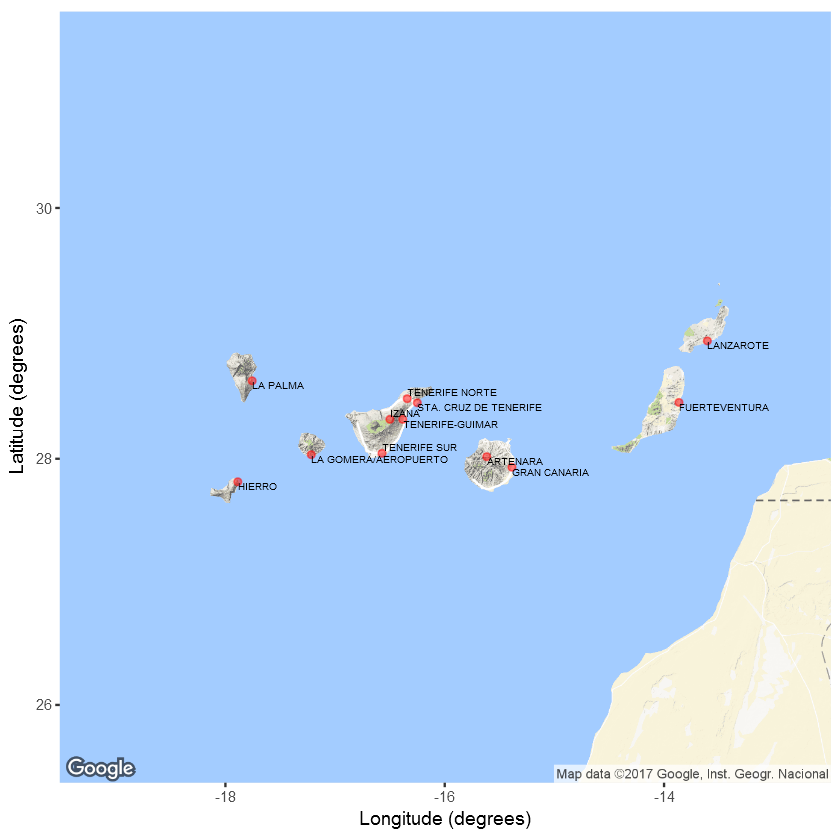

In [90]:
stations_canary$offset<--0.04
stations_canary$offset[stations_canary$name %in% c("IZANA","TENERIFE NORTE","TENERIFE SUR")]<-0.05

mapPoints <- ggmap(map) +
    geom_point(aes(x = lon, y = lat), data = stations_canary, col="red", alpha = .5) +
    geom_text(aes(x = lon, y = lat+offset, label=name), data = stations_canary, size = 2.0, hjust="left")+
    xlab("Longitude (degrees)") + ylab("Latitude (degrees)")
print(mapPoints)

## 4. Get data from a particular station

We are interested in study the weather conditions in 2017 in Teide National Park, that is located in Tenerife island. The nearest station where obtain the data for this study corresponds to Izaña Atmospheric Observatory at 2400 meters above sea level. 

<img src="izana_observatory.jpg" alt="Izaña Atmospheric Observatory" style="width:304px;height:228px;">

In the following code, the funtion get_isd_station_data() of the stationaRy library is used in order to obtain several data of Izaña station. In particular, we get hourly information about time, wind seeed and direction, and temperature along 2017 year.
In the library documentation are described the methods for obtaining another meteorological variables of interest.

In [17]:
tryCatch(
  temps_at_izana <-
    get_isd_stations() %>%
    #filter(name == "IZANA") %>%
    select_isd_station(name = "IZANA") %>%
    get_isd_station_data(startyear = 2017, endyear = 2017) %>%
    select(time, wd, ws, temp) %>% 
    rename(wind_speed=ws,wind_direction=wd),
  error=function(e) {
    cat("Loading data from local file")
    load("temps_at_izana.RData")
  }
  )

In [16]:
temps_at_izana$time<-as.POSIXct(strptime(temps_at_izana$time,format="%Y-%m-%d %H:%M:%S"),format="%Y-%m-%d %H:%M:%S")
head(temps_at_izana)

time,wind_direction,wind_speed,temp
2017-01-01 22:00:00,260,11.3,5.0
2017-01-01 23:00:00,250,10.8,4.5
2017-01-02 00:00:00,260,11.3,5.5
2017-01-02 01:00:00,260,10.8,5.7
2017-01-02 02:00:00,250,12.9,5.1
2017-01-02 03:00:00,250,13.4,4.2


## 5. Different analysis of meteorological data

In the following section, we present some analysis results of Izaña station data. The code for these examples can be found in data analyst blogs (e.g. http://theanalyticalminds.blogspot.com.es/2015/03/part-3a-plotting-with-ggplot2.html).

#### 5.1 Daily temperature

Firstly, we can observe the evolution of temperatures in the National Park by plotting the values observed each day of the 2017 year (the records with null values in temperature are not considered). In the plot is used a color gradient to appreciate the transition from the cold temperatures (blue) to the swarm ones (red). 

In [80]:
temps_at_izana<-temps_at_izana[!is.na(temps_at_izana$temp),]
temps_at_izana<-temps_at_izana[!is.na(temps_at_izana$time),]

`geom_smooth()` using method = 'gam'


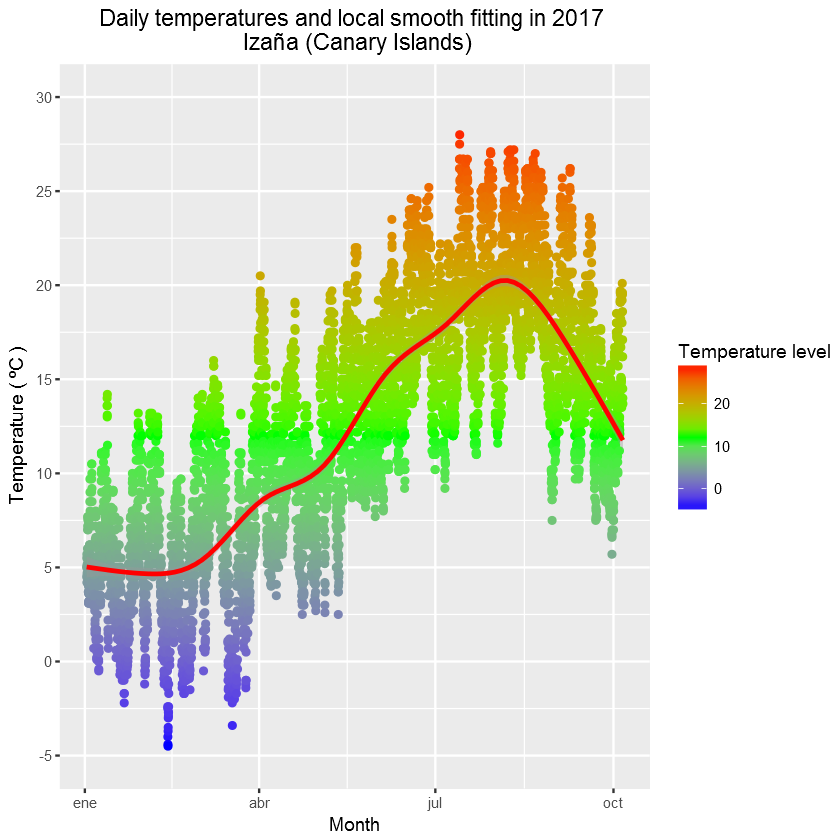

In [79]:
ggplot(temps_at_izana,aes(x = time,y = temp)) + 
  geom_point(aes(colour = temp)) +
  scale_colour_gradient2(name = "Temperature level",low = "blue", mid = "green" , high = "red", midpoint = 12) + 
  geom_smooth(color = "red",size = 1) +
  scale_y_continuous(limits = c(-5,30), breaks = seq(-5,30,5)) +
  ggtitle ("Daily temperatures and local smooth fitting in 2017 \n Izaña (Canary Islands)") +
  xlab("Month") +  ylab ("Temperature ( ºC )") +
  theme(plot.title = element_text(hjust = 0.5))


#### 5.2 Year seasons temperature

We are interested in comparing the pattern of temperatures between the different year seasons. Therefore, we need to compute a season variable by using the zoo library ([Zeileis A. and Grothendieck G., 2005](#zeileis_groth)).

In [82]:
usePackage("zoo")
temps_at_izana$season<-factor(format(as.yearqtr(as.yearmon(temps_at_izana$time, "%m/%d/%Y") + 1/12), "%q"), 
       levels = 1:4, 
       labels = c("winter", "spring", "summer", "fall"))

In [83]:
temps_at_izana %>% group_by(season) %>% summarize(firstDay=min(time),lastDay=max(time))

season,firstDay,lastDay
winter,2017-01-01 22:00:00,2017-02-28 23:00:00
spring,2017-03-01 00:00:00,2017-05-31 23:00:00
summer,2017-06-01 00:00:00,2017-08-31 23:00:00
fall,2017-09-01 00:00:00,2017-10-05 21:00:00


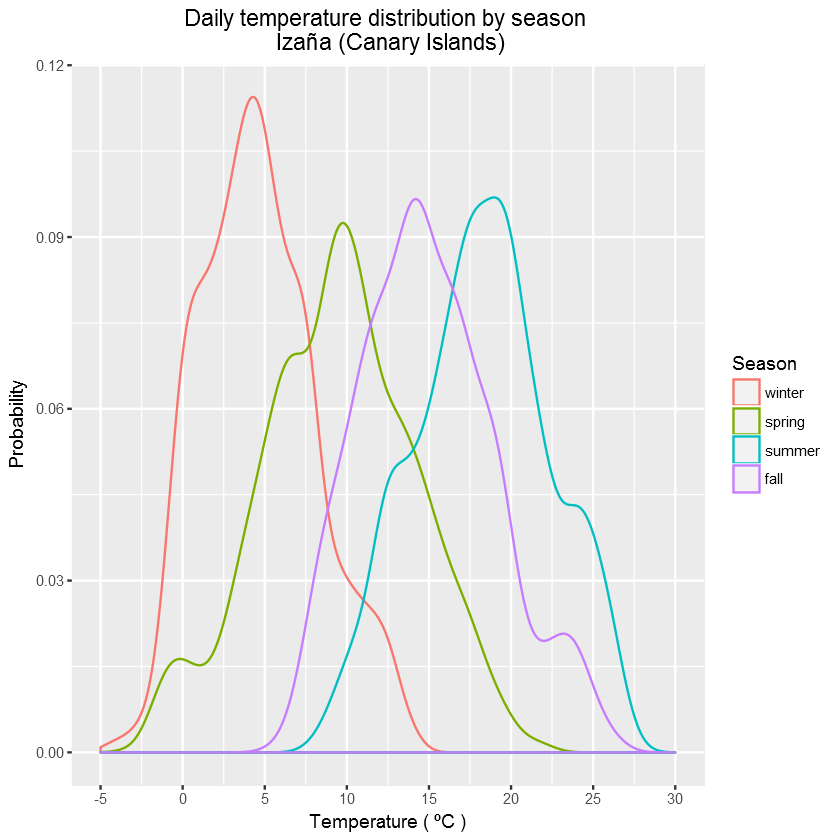

In [84]:
ggplot(temps_at_izana,aes(x = temp, colour = season)) +
  geom_density() +
  scale_x_continuous(limits = c(-5,30), breaks = seq(-5,30,5)) +
  ggtitle ("Daily temperature distribution by season \n Izaña (Canary Islands)") +
  xlab("Temperature ( ºC )") +  ylab ("Probability") + guides(colour=guide_legend(title="Season")) +
  theme(plot.title = element_text(hjust = 0.5))

#### 5.3 Minimum and maximum temperatures

In the next analysis, we obtain the maximum and minimum temperature by day in 2017 and we study the correlation between both values.

In [85]:
temps_at_izana$day<-format(temps_at_izana$time, "%Y-%m-%d")
temps_at_izana$hour<-format(temps_at_izana$time, "%H:%M")
temps_at_izana_min_max<-temps_at_izana %>%
               group_by(day,season) %>% summarize(min_temp=min(temp),max_temp=max(temp))  

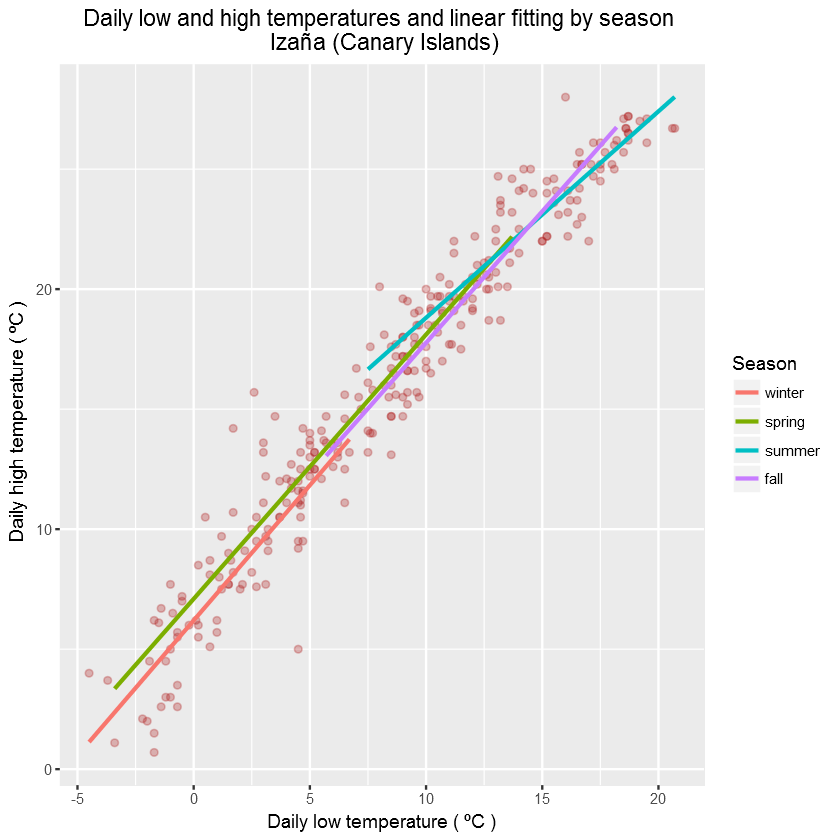

In [87]:
ggplot(temps_at_izana_min_max,aes(x = min_temp, y = max_temp)) +
  geom_point(colour = "firebrick", alpha = 0.3) + 
  geom_smooth(aes(colour = season), method="lm", se= F, size = 0.9) +
  ggtitle ("Daily low and high temperatures and linear fitting by season \n Izaña (Canary Islands)") +
  xlab("Daily low temperature ( ºC )") +  ylab ("Daily high temperature ( ºC )") + 
  guides(colour=guide_legend(title="Season")) +
  theme(plot.title = element_text(hjust = 0.5))

We can also study the distribution of low and high temperatures along the different hours of any day of 2017 in order to compare which parts of the day are more cold or swarm than others. We use in this case the reshape library ([Wickham H., 2007](#wickham2)) to arrange data in appropriate way to plot the frequencies of temperatures in the different daily hours.


In [59]:
temps_at_izana_hour_min_max<-left_join(
  temps_at_izana %>%
  select(day,hour,season,temp) %>%
  group_by(day,season) %>% slice(which.max(temp)) %>% rename(max_temp_hour=hour,max_temp=temp),
  temps_at_izana %>%
  select(day,hour,season,temp) %>%
  group_by(day,season) %>% slice(which.min(temp)) %>% rename(min_temp_hour=hour,min_temp=temp) 
) %>% select(day,season,max_temp_hour,min_temp_hour)


Joining, by = c("day", "season")


In [60]:
usePackage("reshape2") 
temps_at_izana_temperatures <- melt(temps_at_izana_hour_min_max,id.vars = c("day","season"),
                     variable.name = "min.max.temp", value.name = "hour")

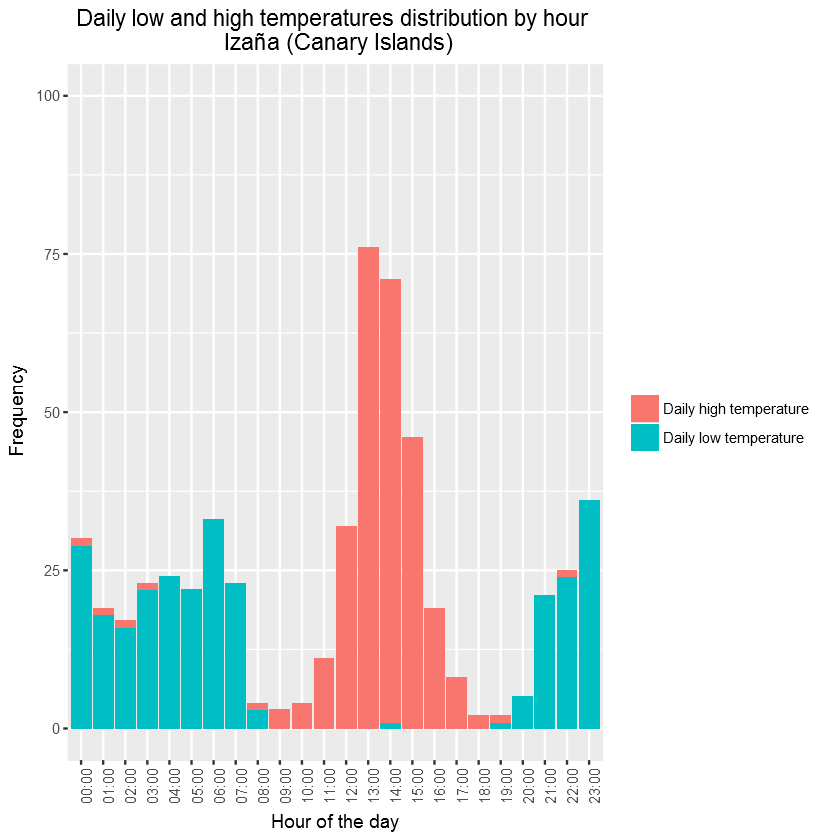

In [64]:
ggplot(temps_at_izana_temperatures) +
  geom_bar(aes(x = hour, fill = min.max.temp)) +
  scale_fill_discrete(name= "", labels = c("Daily high temperature","Daily low temperature")) +
  scale_y_continuous(limits = c(0,100)) +
  ggtitle ("Daily low and high temperatures distribution by hour \n Izaña (Canary Islands)") +
  xlab("Hour of the day") +  ylab ("Frequency") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## 6. References

<a id='iannone'></a>Iannone R. (2015). stationaRy: Get Hourly Meteorological Data from Global Stations. R package version
0.4.1, URL https://CRAN.R-project.org/package=stationaRy.

<a id='kahle_wickham'></a>Kahle D. and Wickham H. (2013) ggmap: Spatial Visualization with ggplot2. The R Journal, 5(1), 144-161, URL http://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

<a id='wickham1'></a>Wickham H. (2009). ggplot2: Elegant Graphics for Data Analysis, Springer-Verlag, New York, URL http://ggplot2.org.

<a id='wickham2'></a>Wickham H. (2007). Reshaping Data with the reshape Package, Journal of Statistical Software, 21(12), pp. 1-20. URL http://www.jstatsoft.org/v21/i12/

<a id='wickham_et_al'></a>Wickham H., Francois R., Henry L. and Müller K. (2017). dplyr: A Grammar of Data Manipulation. R package version
0.7.3, URL https://CRAN.R-project.org/package=dplyr.

<a id='zeileis_groth'></a>Zeileis A. and Grothendieck G. (2005). zoo: S3 Infrastructure for Regular and Irregular Time Series. Journal of Statistical Software, 14(6), pp. 1-27.